# Machine Learning Project Store sales to predict grocery sales

## Store Sales - Time Series Forecasting
### Using machine learning to predict grocery sales

We downloaded datasets from [Kaggle.com](https://kaggle.com) and predicted grocery sales as per required. We learn machine learning from `Zero to GBMs` machine learning. 

I hope you apreciate this project!

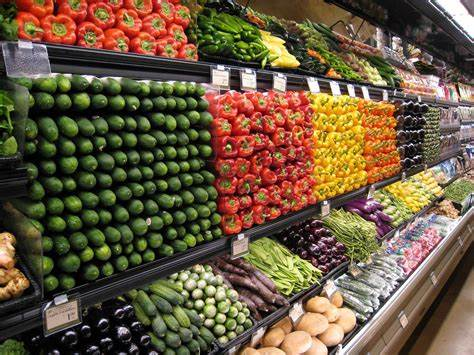

#### File Descriptions and Data Field Information
##### train.csv
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
##### test.csv
The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.
##### sample_submission.csv
A sample submission file in the correct format.
##### stores.csv
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.
##### oil.csv
Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

##### This data set downloaded from ``kaggle.com``  and we  data analys is visualization some instrated columns using machine learning to predict grocery sales.

we istalling and importing required library.

In [1]:
!pip install opendatasets --upgarde --quiet
import opendatasets as od


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgarde


In [2]:
od.download('https://www.kaggle.com/competitions/store-sales-time-series-forecasting')

Skipping, found downloaded files in ".\store-sales-time-series-forecasting" (use force=True to force download)


In [3]:
import os

In [4]:
os.listdir('store-sales-time-series-forecasting')

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [5]:


import pandas as pd
import numpy as np
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [6]:
train = pd.read_csv("./store-sales-time-series-forecasting/train.csv")

In [7]:
test = pd.read_csv('./store-sales-time-series-forecasting/test.csv')

In [8]:
stores =pd.read_csv('./store-sales-time-series-forecasting/stores.csv')

In [9]:
transactions = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv')

In [10]:
oil = pd.read_csv('./store-sales-time-series-forecasting/oil.csv')

In [11]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [12]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [13]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [14]:
submission = pd.read_csv('./store-sales-time-series-forecasting/sample_submission.csv')

In [15]:
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [16]:
train_df = train.merge(stores, how='left', on='store_nbr')
test_df = test.merge(stores, how='left', on= 'store_nbr')

In [17]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


#### Visualization
Below we can see that maximum sales in cluster 5 and hue type A mean cluster 5 only type A sales. cluster 10 is sales type B D E. Other you see below graph.

Text(0.5, 1.0, 'sales vs cluster')

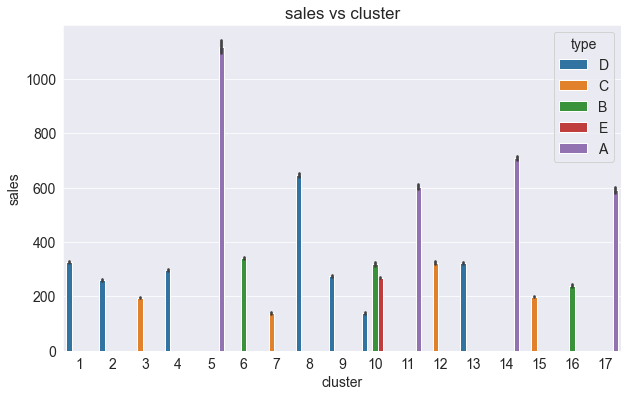

In [18]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(data= train_df, x='cluster', y= 'sales', hue= 'type')
plt.title('sales vs cluster')

In [19]:
train_df.describe()

,id,store_nbr,sales,onpromotion,cluster
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type         object 
 9   cluster      int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 251.8+ MB


now we adding date columns into year month day and weakofyear as per seperate columns shown in below train_df.

In [21]:
def split_date(df):
    df['Date']= pd.to_datetime(df['date'])
    df['year'] = df.Date.dt.year
    df['Month'] =df.Date.dt.month
    df['day'] = df.Date.dt.day
    df['Weekofyear']= df.Date.dt.isocalendar().week

In [22]:
split_date(train_df)
split_date(test_df)

In [23]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,Date,year,Month,day,Weekofyear
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,2013-01-01,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,2013-01-01,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,2013-01-01,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,2013-01-01,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,2013-01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2017-08-15,2017,8,15,33
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2017-08-15,2017,8,15,33
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2017-08-15,2017,8,15,33
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2017-08-15,2017,8,15,33


In [24]:
train_df['store_nbr'].isna().value_counts()

False    3000888
Name: store_nbr, dtype: int64

Also graphically visualitzation sale in year and as hue month so obtain over all maximun sale in 2017 and all month sale is nearly equal but monthly maximum sale in 2016 december overall sale show in below graph very changes apply as hue month.

Text(0.5, 1.0, 'years vs sales')

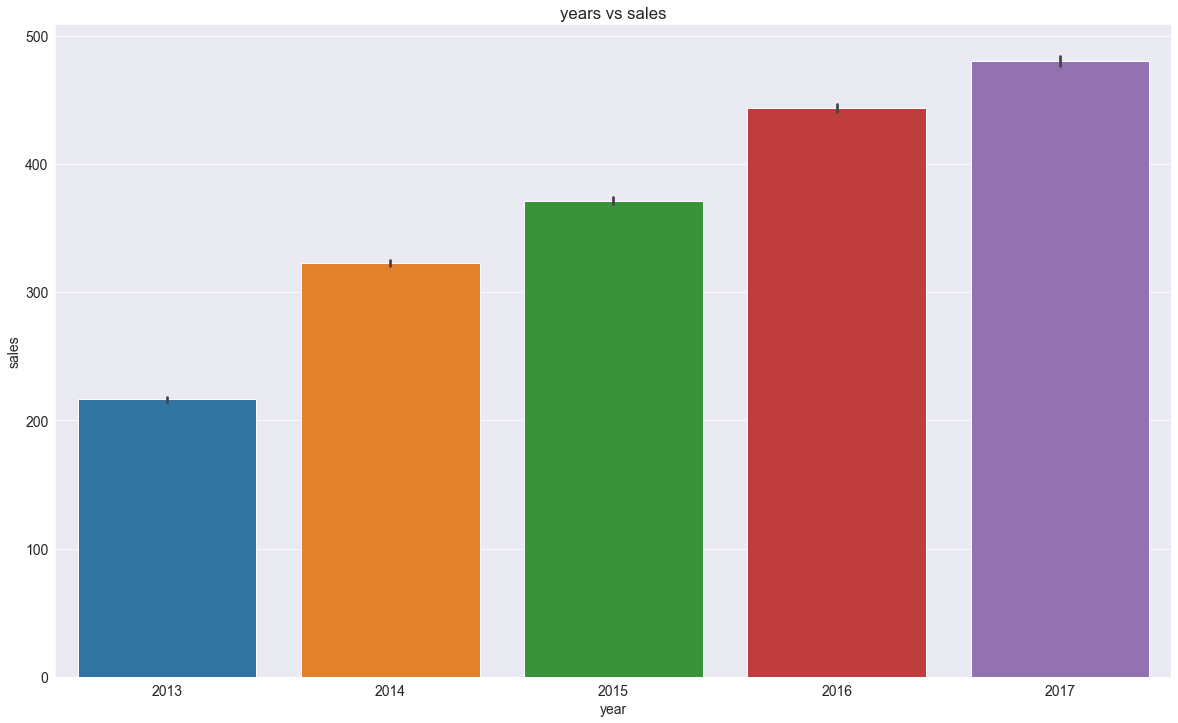

In [25]:
plt.figure(figsize=(20,12))
sns.barplot(data= train_df, x='year' , y= 'sales' )
plt.title('years vs sales')

Text(0.5, 1.0, 'years vs sales as hue month')

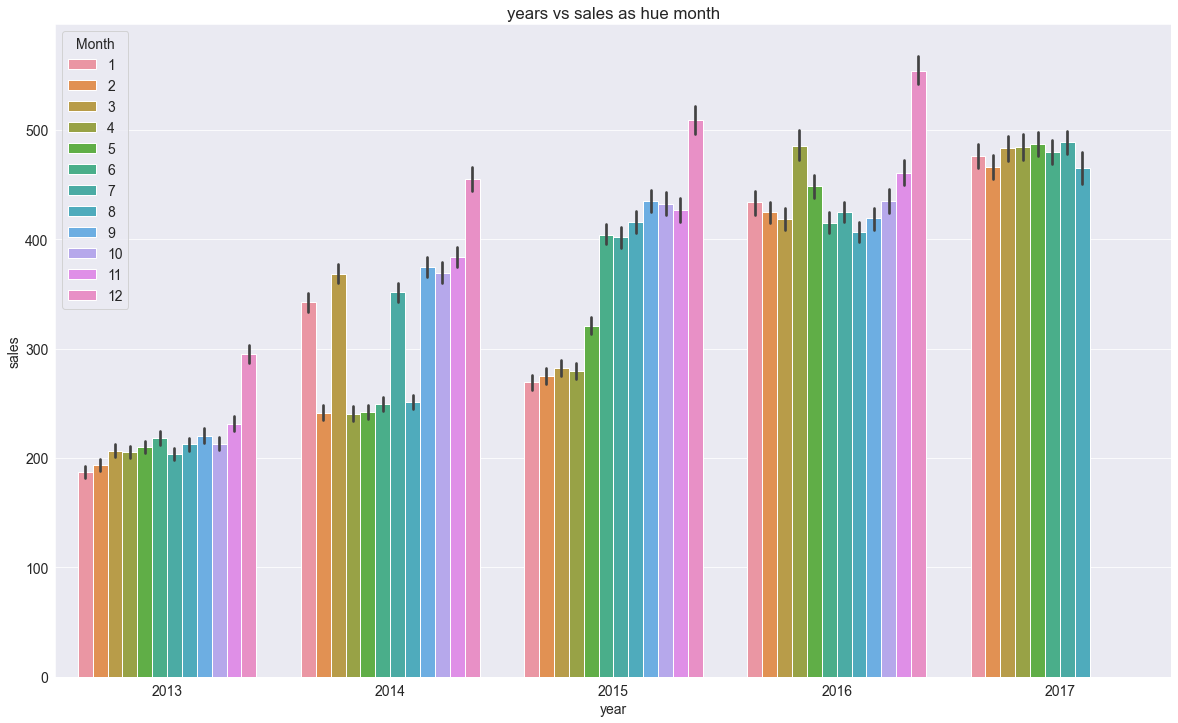

In [26]:
plt.figure(figsize=(20,12))
sns.barplot(data= train_df, x='year' , y= 'sales' ,hue= 'Month')
plt.title('years vs sales as hue month')

Now required columns to converting in input_col and Target_col columns and using some datatype to get seperating numerical categorical columns shown in below.

In [27]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'Date', 'year', 'Month', 'day',
       'Weekofyear'],
      dtype='object')

In [28]:
input_col = ['id',  'store_nbr', 'family', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'Date', 'year', 'Month', 'day',
       'Weekofyear']
target_col = 'sales'

In [29]:
inputs= train_df[input_col].copy()
targets= train_df[target_col].copy()

In [30]:
test_inputs = test_df[input_col].copy()

In [31]:
numeric_col = train_df[input_col].select_dtypes(include=np.number).columns.tolist()
categorical_col = train_df[input_col].select_dtypes(include='object').columns.tolist()

In [32]:
inputs[numeric_col].isna().sum()

id             0
store_nbr      0
onpromotion    0
cluster        0
year           0
Month          0
day            0
Weekofyear     0
dtype: int64

In [33]:
inputs[categorical_col]

,family,city,state,type
0,AUTOMOTIVE,Quito,Pichincha,D
1,BABY CARE,Quito,Pichincha,D
2,BEAUTY,Quito,Pichincha,D
3,BEVERAGES,Quito,Pichincha,D
4,BOOKS,Quito,Pichincha,D
...,...,...,...,...
3000883,POULTRY,Quito,Pichincha,B
3000884,PREPARED FOODS,Quito,Pichincha,B
3000885,PRODUCE,Quito,Pichincha,B
3000886,SCHOOL AND OFFICE SUPPLIES,Quito,Pichincha,B


Now we using some MinMaxScaler to dataset range in 0 to 1 and OnehotEncoder to categorical column creating its now columns show in below

In [34]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(inputs[numeric_col])

MinMaxScaler()

In [37]:
inputs[numeric_col] = scaler.transform(inputs[numeric_col])

In [38]:
encoder = OneHotEncoder(sparse=False , handle_unknown= 'ignore').fit(inputs[categorical_col])

In [39]:
encoded_col = list(encoder.get_feature_names(categorical_col))

C:\Users\mdzee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
inputs[encoded_col]= encoder.transform(inputs[categorical_col])


We adding (numerical_col + categorical_col) creating input dataset and this dataset to spliting into 75% in train_inputs and 25% val_input shown in below.

In [41]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs[numeric_col + encoded_col], targets, test_size=0.25, random_state=42)

In [42]:
train_inputs

,id,store_nbr,onpromotion,cluster,year,Month,day,Weekofyear,family_AUTOMOTIVE,family_BABY CARE,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
2886109,0.961752,0.698113,0.000000,0.1875,1.00,0.454545,0.366667,0.442308,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1308436,0.436016,0.377358,0.000000,0.3125,0.50,0.000000,0.200000,0.019231,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2505116,0.834792,0.886792,0.000000,0.8125,0.75,0.909091,0.266667,0.846154,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
916601,0.305443,0.490566,0.000000,0.0000,0.25,0.363636,1.000000,0.403846,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
470668,0.156843,0.264151,0.000000,0.8750,0.00,0.727273,0.700000,0.711538,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,0.564081,1.000000,0.000000,0.1250,0.50,0.636364,0.300000,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2356330,0.785211,0.415094,0.000000,0.5000,0.75,0.636364,0.566667,0.615385,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2229084,0.742808,0.981132,0.000000,0.7500,0.75,0.454545,0.200000,0.423077,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2768307,0.922496,0.603774,0.020243,0.1250,1.00,0.272727,0.200000,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
train_inputs.describe()

,id,store_nbr,onpromotion,cluster,year,Month,day,Weekofyear,family_AUTOMOTIVE,family_BABY CARE,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
count,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,...,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06,2.250666e+06
mean,4.999188e-01,4.999873e-01,3.513917e-03,4.676302e-01,4.593802e-01,4.734409e-01,4.875283e-01,4.661610e-01,3.029637e-02,3.029948e-02,...,1.844165e-02,3.518074e-01,1.848831e-02,5.553601e-02,3.714234e-02,1.666573e-01,1.481379e-01,2.777956e-01,3.333769e-01,7.403231e-02
std,2.886557e-01,2.940841e-01,1.650841e-02,2.905725e-01,3.363103e-01,3.078186e-01,2.931347e-01,2.845352e-01,1.714016e-01,1.714101e-01,...,1.345421e-01,4.775344e-01,1.347089e-01,2.290235e-01,1.891106e-01,3.726697e-01,3.552367e-01,4.479121e-01,4.714200e-01,2.618235e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.499455e-01,2.452830e-01,0.000000e+00,1.875000e-01,2.500000e-01,1.818182e-01,2.333333e-01,2.307692e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.998950e-01,4.905660e-01,0.000000e+00,5.000000e-01,5.000000e-01,4.545455e-01,5.000000e-01,4.615385e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.497759e-01,7.547170e-01,0.000000e+00,7.500000e-01,7.500000e-01,7.272727e-01,7.333333e-01,7.115385e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Now adding LinearRegression model form scikit learn to getting a score and RMSE 

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression().fit(train_inputs, train_targets)

In [46]:
lr.score(train_inputs, train_targets)

0.5717261434812542

In [47]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [48]:
rmse(lr.predict(train_inputs), train_targets)

719.3539861586951

Also we installing xgboost import XGBRegressor to predicting score and RMSE looking better result getting from LinearRegressor 

In [49]:
!pip install xgboost
from xgboost import XGBRegressor

In [50]:
xgb = XGBRegressor().fit(train_inputs, train_targets)

In [51]:
preds = xgb.predict(train_inputs)

In [52]:
xgb.score(train_inputs, train_targets)

0.9036191378992884

In [53]:
rmse(preds, train_targets)

341.2536268146079

In [54]:
xgb.score(val_inputs, val_targets)

0.8890230742628024

In [55]:
trees = xgb.get_booster().get_dump()

In [56]:
len(trees)

100

In [57]:
print(trees[0])

0:[family_GROCERY I<0.5] yes=1,no=2,missing=1
	1:[family_BEVERAGES<0.5] yes=3,no=4,missing=3
		3:[family_PRODUCE<0.5] yes=7,no=8,missing=7
			7:[family_CLEANING<0.5] yes=15,no=16,missing=15
				15:[family_DAIRY<0.5] yes=31,no=32,missing=31
					31:[family_BREAD/BAKERY<0.5] yes=59,no=60,missing=59
						59:leaf=22.6533489
						60:leaf=138.804459
					32:[type_A<0.5] yes=61,no=62,missing=61
						61:leaf=163.984253
						62:leaf=454.866852
				16:[type_A<0.5] yes=33,no=34,missing=33
					33:[store_nbr<0.198113203] yes=63,no=64,missing=63
						63:leaf=370.218353
						64:leaf=244.267899
					34:[store_nbr<0.952830195] yes=65,no=66,missing=65
						65:leaf=619.822266
						66:leaf=35.7999229
			8:[id<0.522300601] yes=17,no=18,missing=17
				17:[onpromotion<0.197705805] yes=35,no=36,missing=35
					35:[id<0.216750413] yes=67,no=68,missing=67
						67:leaf=0.957877696
						68:leaf=229.745117
					36:[cluster<0.46875] yes=69,no=70,missing=69
						69:leaf=2205.38354
						70:leaf=1422.6397

## FEATURE IMPORTANCE
just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [58]:
importance_df = pd.DataFrame({
    'feature' : train_inputs.columns,
    'importance' : xgb.feature_importances_
}).sort_values('importance', ascending= False)

In [59]:
importance_df.head(10)

,feature,importance
20,family_GROCERY I,0.302085
11,family_BEVERAGES,0.117269
79,type_A,0.088716
38,family_PRODUCE,0.051306
15,family_CLEANING,0.050808
16,family_DAIRY,0.032262
75,state_Pichincha,0.030023
13,family_BREAD/BAKERY,0.023670
59,city_Quito,0.021951
1,store_nbr,0.021259


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

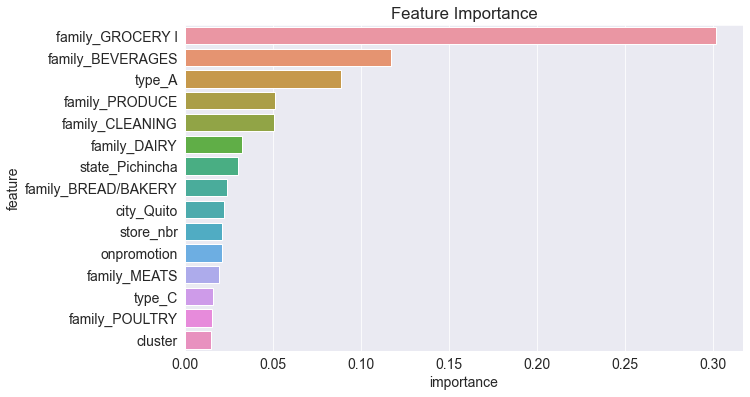

In [60]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data= importance_df.head(15), x='importance', y= 'feature', )

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
score1 = cross_val_score(xgb, train_inputs, train_targets,cv=3)

In [63]:
np.average(score1)

0.891550743796774

#### Hyper parameter
we getting better result from Linear Regression in xgboost regression so now we using different different hyperparameter to predicting better result.

In [64]:
def test_params(**params):
    model = XGBRegressor(**params).fit(train_inputs, train_targets)
    train_rmse= rmse(model.pridict(train_inputs, train_targets), train_targets)
    val_ramse = rmse(model.pridict(val_inputs, val_targets), val_targets)
    return train_rmse, val_rmse

In [65]:
def test_params(**params):
    model = XGBRegressor( random_state=42, n_jobs=-1,**params)
    model.fit(train_inputs, train_targets)
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(val_inputs), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [66]:
%%time
test_params(max_depth=15, n_estimators=50)   

Train RMSE: 116.30207552389739, Validation RMSE: 291.41998314684884
CPU times: total: 1h 3min 2s
Wall time: 8min 50s


In [67]:
%%time
test_params(max_depth=20, n_estimators=100)

Train RMSE: 29.98628482199112, Validation RMSE: 305.9482253560381
CPU times: total: 3h 22min 48s
Wall time: 26min 59s


In [68]:
%%time
test_params(max_depth=10, n_estimators=50)

Train RMSE: 251.07023541435078, Validation RMSE: 317.8360488382548
CPU times: total: 40min 48s
Wall time: 5min 24s


In [69]:
%%time
test_params(max_depth=2, n_estimators=50)

Train RMSE: 595.5863558643854, Validation RMSE: 602.4348429372402
CPU times: total: 8min 17s
Wall time: 1min 10s


In [75]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,Date,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,1.000000,2017-08-16,0.000000,AUTOMOTIVE,0.000000,Quito,Pichincha,D,0.7500,2017-08-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.000001,2017-08-16,0.000000,BABY CARE,0.000000,Quito,Pichincha,D,0.7500,2017-08-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000001,2017-08-16,0.000000,BEAUTY,0.002699,Quito,Pichincha,D,0.7500,2017-08-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000001,2017-08-16,0.000000,BEVERAGES,0.026991,Quito,Pichincha,D,0.7500,2017-08-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.000002,2017-08-16,0.000000,BOOKS,0.000000,Quito,Pichincha,D,0.7500,2017-08-16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,1.009500,2017-08-31,0.150943,POULTRY,0.001350,Quito,Pichincha,B,0.3125,2017-08-31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28508,1.009500,2017-08-31,0.150943,PREPARED FOODS,0.000000,Quito,Pichincha,B,0.3125,2017-08-31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28509,1.009501,2017-08-31,0.150943,PRODUCE,0.001350,Quito,Pichincha,B,0.3125,2017-08-31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28510,1.009501,2017-08-31,0.150943,SCHOOL AND OFFICE SUPPLIES,0.012146,Quito,Pichincha,B,0.3125,2017-08-31,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
test_df[numeric_col] = scaler.transform(test_df[numeric_col])
test_df[encoded_col] = encoder.transform(test_df[categorical_col])

In [78]:
test_inputs = test_df[numeric_col + encoded_col]

Now we get best hyper parameter in XGBRegerssor to predicting test datatset to sales prediction.

In [80]:
model=XGBRegressor( random_state=42, n_jobs=-1,max_depth=15, n_estimators=50)

In [81]:
model.fit(train_inputs, train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
model.score(val_inputs,val_targets)

0.9311107303119665

In [84]:
test_preds = model.predict(test_inputs)

In [85]:
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [86]:
submission['sales'] = test_preds

We analysis in LinearRegression and XGBboost and we get better accuracy score in XGBboost so we using this one with the help of hyper parameter to predict sales.

In [87]:
submission

,id,sales
0,3000888,10.086947
1,3000889,4.144462
2,3000890,1.949235
3,3000891,2106.938721
4,3000892,4.985345
...,...,...
28507,3029395,457.113129
28508,3029396,87.870384
28509,3029397,1474.737671
28510,3029398,197.884033


In [88]:
submission.to_csv('submission.csv', index = False)

In [89]:
from IPython.display import FileLink

In [90]:
FileLink('submission.csv')

C:\Users\mdzee\Documents\submission.csv

We submittied this submission flie in kaggle compitition. and getted `score : 0.99138` 

### Reference
-  We learning machine learning from Zero to GBMs  thanks freecodecamp and Jovian.ml 

-  kaggle.com using donloading datasets to predicting grocery Sales.

-  some Knowledge to using google search to resolving isues.

-  I hope you enjoying this project.



In [99]:
!pip install jovian --upgrade --quiet
import jovian

In [100]:
jovian.commit(project='Machine Learning Project Store sales to predict grocery sales', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mdzee888/machine-learning-project-store-sales-to-predict-grocery-sales" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mdzee888/machine-learning-project-store-sales-to-predict-grocery-sales


'https://jovian.ai/mdzee888/machine-learning-project-store-sales-to-predict-grocery-sales'